In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import librosa
import IPython.display as ipd
import librosa.display

from pathlib import Path

from threading import Thread

In [2]:
PATH = Path().parent
DDIR = PATH / 'dataset'
HAPPYDIR = DDIR / 'Happy'
SADDIR = DDIR / 'Sad'

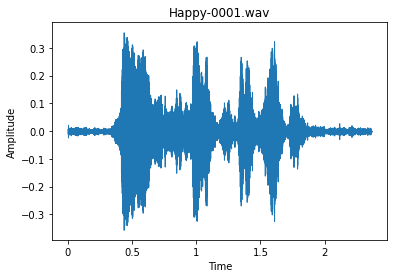

In [3]:
path = f'{HAPPYDIR}/happy-0001.wav'
audio_obj = ipd.Audio(path)
audio,sr = librosa.load(path)

librosa.display.waveshow(audio, sr=sr)
# plt.plot(audio)
plt.title(f'Happy-0001.wav')
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()


In [4]:
len(np.linspace(0, len(audio)/sr, len(audio)))

52237

In [5]:
# t = np.linspace(0, 0.5,500)
# fft = np.fft.fft(audio)
# T = t[1] - t[0]  # sampling interval
# N = audio.size

# f = np.linspace(0, 1 / T, N)

# plt.ylabel('Amplitude')
# plt.xlabel('Frequency [Hz]')
# plt.bar(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
# plt.show()



In [6]:
# plt.xlabel('Amplitude')
# plt.ylabel('Frequency [Hz]')
# plt.bar(np.abs(fft)[:N // 2] * 1 / N, f[:N // 2], width=1.5)  # 1 / N is a normalization factor
# plt.show()

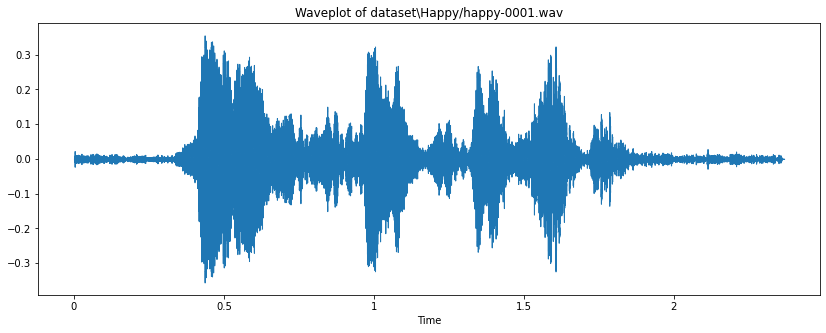

In [7]:
@lambda _:_(path)
def display_wave(audio_path:str=None)->ipd.Audio:
    au_obj = ipd.Audio(audio_path)
    audio, sr = librosa.load(audio_path)

    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f'Waveplot of {audio_path}')
    plt.show()
    
    return au_obj

# display_wave(path)

In [8]:
# @lambda _:_(path)
def amplitude_envelope(audio_path:str=None, frame_size:int=2048, hop_len:int=512, visualize:bool=True):
    signal, sr = librosa.load(audio_path)
    amplitude_envelope = np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_len)])

    frames = range(0, len(amplitude_envelope))
    times = librosa.frames_to_time(frames, hop_length=hop_len)

    if visualize:
        plt.figure(figsize=(14, 5))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, amplitude_envelope, color='r')
        plt.title(f'Amplitude Envelope of {audio_path}')
        plt.show()
    return amplitude_envelope

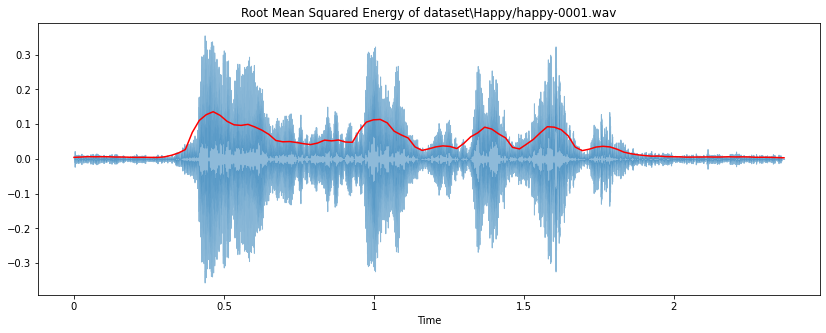

In [62]:
@lambda _:_(path)
def root_mean_squared(audio_path:str=None, frame_size:int=2048, hop_len:int=512, visualize:bool=True):
    signal, sr = librosa.load(audio_path)
    rms_energy = librosa.feature.rms(y=signal, frame_length=frame_size, hop_length=hop_len)[0]

    frames = range(0, len(rms_energy))
    times = librosa.frames_to_time(frames, hop_length=hop_len)

    if visualize:
        plt.figure(figsize=(14, 5))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, rms_energy, color='r')
        plt.title(f'Root Mean Squared Energy of {audio_path}')
        plt.show()
    return rms_energy

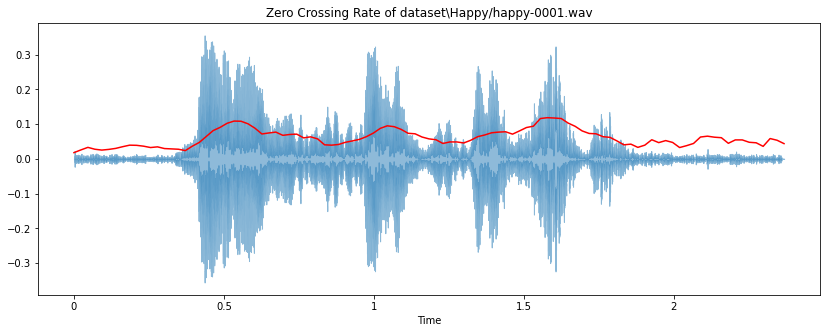

In [63]:
@lambda _:_(path)
def zero_crossing_rate(audio_path:str=None, frame_size:int=2048, hop_len:int=512, visualize:bool=True):
    signal, sr = librosa.load(audio_path)
    zcr = librosa.feature.zero_crossing_rate(y=signal, frame_length=frame_size, hop_length=hop_len)[0]

    frames = range(0, len(zcr))
    times = librosa.frames_to_time(frames, hop_length=hop_len)

    if visualize:
        plt.figure(figsize=(14, 5))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, zcr, color='r')
        plt.title(f'Zero Crossing Rate of {audio_path}')
        plt.show()
    return zcr

In [11]:
# @lambda _:_(path)
def spectral_centroid(audio_path:str=None, frame_size:int=2048, hop_len:int=512, visualize:bool=True):
    signal, sr = librosa.load(audio_path)
    spectral_centroids = librosa.feature.spectral_centroid(y=signal, sr=sr, n_fft=frame_size, hop_length=hop_len)[0]

    frames = range(0, len(spectral_centroids))
    times = librosa.frames_to_time(frames, hop_length=hop_len)

    if visualize:
        plt.figure(figsize=(14, 5))
        plt.plot(times, spectral_centroids, color='r')
        plt.title(f'Spectral Centroid of {audio_path}')
        plt.xlabel('Time')
        plt.show()
    return spectral_centroids

In [12]:
# @lambda _:_(path)
def spectral_bandwidth(audio_path:str=None, frame_size:int=2048, hop_len:int=512, visualize:bool=True):
    signal, sr = librosa.load(audio_path)
    spectral_bandwidth_ = librosa.feature.spectral_bandwidth(y=signal, sr=sr, n_fft=frame_size, hop_length=hop_len)[0]

    frames = range(0, len(spectral_bandwidth_))
    times = librosa.frames_to_time(frames, hop_length=hop_len)

    if visualize:
        plt.figure(figsize=(14, 5))
        plt.plot(times, spectral_bandwidth_, color='r')
        plt.title(f'Spectral Bandwidth of {audio_path}')
        plt.xlabel('Time')
        plt.show()
    return spectral_bandwidth_

In [13]:
# @lambda _:_(path)
def band_energy_ratio(audio_obj:str=None, frame_size:int=2048, hop_len:int=512, split_frequency:int=2000, visualize:bool=True):
    signal, sr = librosa.load(audio_obj)
    signal_stft = librosa.stft(y=signal, n_fft=frame_size, hop_length=hop_len)
    frequency_range = sr / 2
    frequency_delta_per_bin = frequency_range / signal_stft.shape[0]
    split_frequency_bin = int(np.floor(split_frequency / frequency_delta_per_bin))

    power_spectrum = np.abs(signal_stft**2).T
    band_energy_ration:list = []
    for freq_in_frame in power_spectrum:
        low_freq_sum = np.sum(freq_in_frame[:split_frequency_bin])
        high_freq_sum = np.sum(freq_in_frame[split_frequency_bin:])
        frame_bar = low_freq_sum / high_freq_sum
        band_energy_ration.append(frame_bar)

    band_energy_ration = np.array(band_energy_ration)
    
    frames = range(0, len(band_energy_ration))
    times = librosa.frames_to_time(frames, hop_length=hop_len)

    if visualize:
        plt.figure(figsize=(14, 5))
        plt.plot(times, band_energy_ration, color='r')
        plt.title(f'Band Energy Ratio of {audio_obj}')
        plt.xlabel('Time')
        plt.show()
    return band_energy_ration



In [14]:
# @lambda _:_(path)
def frequency_spectogram(audio_obj:str=None, frame_rate:int=2048, hop_len:int=512, visualize:bool=True):
    signal, sr = librosa.load(audio_obj)
    signal_stft = librosa.stft(y=signal, n_fft=frame_rate, hop_length=hop_len)
    spectrum = np.abs(signal_stft)**2
    db_spectrum = librosa.power_to_db(spectrum)

    # signal_stft_db = librosa.amplitude_to_db(np.abs(signal_stft))

    if visualize:
        plt.figure(figsize=(14, 5))
        librosa.display.specshow(db_spectrum, sr=sr, hop_length=hop_len, x_axis='time', y_axis='hz')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Frequency Spectogram of {audio_obj}')
        plt.show()
    return db_spectrum

In [15]:
# @lambda _:_(path)
def mel_spectogram(audio_obj:str=None, frame_rate:int=2048, hop_len:int=512, mel_band:int=90, visualize:bool=True):
    signal, sr = librosa.load(audio_obj)
    mel_spectogram = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=frame_rate, hop_length=hop_len, n_mels=mel_band)
    db_mel_spectogram = librosa.power_to_db(mel_spectogram)

    if visualize:
        plt.figure(figsize=(14, 5))
        librosa.display.specshow(db_mel_spectogram, sr=sr, hop_length=hop_len, x_axis='time', y_axis='hz')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Mel Spectogram of {audio_obj}')
        plt.show()
    return mel_spectogram

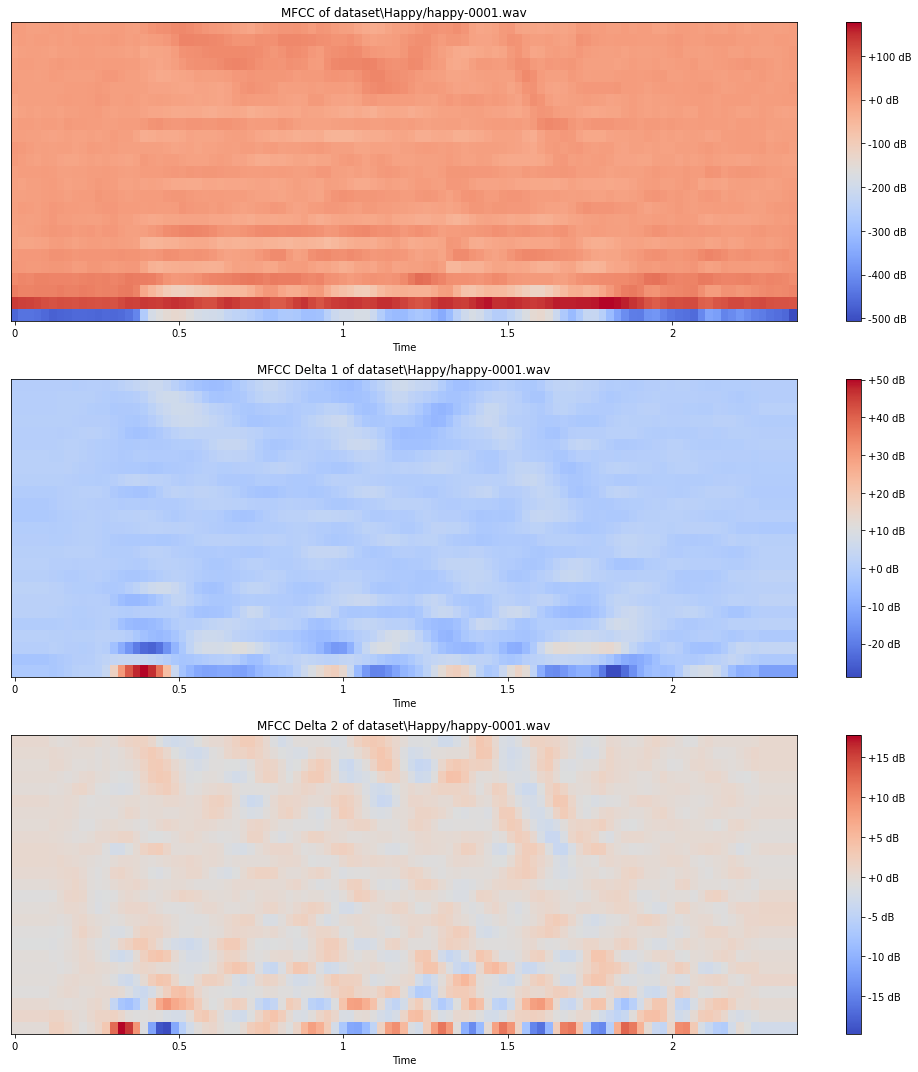

In [64]:
@lambda _:_(path)
def mfcc(audio_obj:str=None, frame_rate:int=2048, hop_len:int=512, mfcc_num:int=25, visualize:bool=True):
    signal, sr = librosa.load(audio_obj)
    mfcc_spectrum = librosa.feature.mfcc(y=signal, sr=sr, n_fft=frame_rate, hop_length=hop_len, n_mfcc=mfcc_num)
    delta_1_mfcc = librosa.feature.delta(mfcc_spectrum, order=1)
    delta_2_mfcc = librosa.feature.delta(mfcc_spectrum, order=2)

    mfcc_features = np.concatenate((np.mean(mfcc_spectrum, axis=1), np.mean(delta_1_mfcc, axis=1), np.mean(delta_2_mfcc, axis=1)))

    if visualize:
        plt.figure(figsize=(14, 15))
        plt.subplot(3, 1, 1)
        librosa.display.specshow(mfcc_spectrum, sr=sr, hop_length=hop_len, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'MFCC of {audio_obj}')

        plt.subplot(3, 1, 2)
        librosa.display.specshow(delta_1_mfcc, sr=sr, hop_length=hop_len, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'MFCC Delta 1 of {audio_obj}')

        plt.subplot(3, 1, 3)
        librosa.display.specshow(delta_2_mfcc, sr=sr, hop_length=hop_len, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'MFCC Delta 2 of {audio_obj}')

        plt.tight_layout()
        plt.show()
    return mfcc_features
    

In [17]:
import os
from tqdm import tqdm
from threading import Thread

# @lambda _:_(path)
def audio_features(path:str=None, frame_size:int=2048, hop_len:int=512, mfcc_num:int=20):
    audios_mfcc, audios_zcr, audios_rmse, audios_label = [],[],[],[]
    
    audio_files = os.listdir(path)
    for audio_name in tqdm(audio_files):
        # print(f'{path}/{audio_name}')
        mfcc_score = mfcc(audio_obj=f'{path}/{audio_name}', frame_rate=frame_size, hop_len=hop_len, mfcc_num=mfcc_num, visualize=False)
        zcr_score = np.mean(zero_crossing_rate(audio_path=f'{path}/{audio_name}', frame_size=frame_size, hop_len=hop_len, visualize=False))
        rmse_score = np.mean(root_mean_squared(audio_path=f'{path}/{audio_name}', frame_size=frame_size, hop_len=hop_len, visualize=False))
        
        audios_mfcc.append(mfcc_score)
        audios_zcr.append(zcr_score)
        audios_rmse.append(rmse_score)
        audios_label.append(audio_name.split('/')[0].split('-')[0])

    # print(len(audios_mfcc), len(audios_zcr), len(audios_rmse), len(audios_label))
    # print(audios_mfcc[0].shape, audios_zcr[0].shape, audios_rmse[0].shape)
    audio_features = np.column_stack((audios_mfcc, audios_zcr, audios_rmse))
    # print(audio_features.shape)
    df = pd.DataFrame(audio_features)
    df.insert(loc=0, column='name', value=audio_files)
    df['label'] = audios_label

    return df

In [18]:
print(HAPPYDIR)

dataset\Happy


In [19]:
df = audio_features(path=HAPPYDIR, mfcc_num=20)

  0%|          | 1/1087 [00:00<03:03,  5.92it/s]

100%|██████████| 1087/1087 [00:27<00:00, 39.06it/s]


In [20]:
df_sad = audio_features(path=SADDIR, mfcc_num=20)

100%|██████████| 1087/1087 [00:27<00:00, 38.89it/s]


<h1><font color='red'>NOTE! SAD NO 192 ERROR!</font></h1>

In [21]:
df_fix = pd.concat([df, df_sad])

In [22]:
df_fix.reset_index(drop=True, inplace=True)
df_fix

,name,0,1,2,3,4,5,6,7,8,...,53,54,55,56,57,58,59,60,61,label
0,happy-0001.wav,-314.457886,129.294830,-17.988623,33.474461,-11.482511,11.786289,-18.851305,11.302917,-13.167466,...,0.012040,0.005879,0.028319,-0.029148,-0.036382,0.008265,0.018841,0.060542,0.042121,happy
1,happy-0002.wav,-395.502869,136.012527,2.375357,54.128048,-7.307978,23.552362,-23.973137,14.294264,-10.774253,...,0.017362,-0.018477,0.002029,-0.007749,-0.017186,0.004380,-0.015457,0.056817,0.016707,happy
2,happy-0003.wav,-366.721985,132.242188,8.187970,50.447689,-0.746726,10.303167,-12.941866,3.299066,-12.599129,...,0.039773,0.000470,-0.001448,0.001151,-0.006098,0.003033,0.020679,0.046481,0.028754,happy
3,happy-0004.wav,-373.125977,141.114120,-5.783168,48.331936,-8.069846,11.951582,-14.797240,5.968352,-8.678324,...,-0.045382,0.015618,-0.041267,-0.058196,0.033287,0.041998,0.034715,0.052498,0.022308,happy
4,happy-0005.wav,-338.726593,132.259232,-8.114789,44.194748,-7.917725,5.655036,-16.220108,7.988503,-5.889780,...,0.004920,0.015511,0.024280,0.007318,0.057902,-0.003076,-0.043340,0.051477,0.036355,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,sad-1084.wav,-417.924408,139.764908,12.273930,52.263084,-17.304499,27.862864,-14.208331,12.585475,-16.029865,...,0.018113,0.007671,0.040276,-0.011110,-0.022177,0.020251,-0.014291,0.059745,0.013470,sad
2170,sad-1085.wav,-446.779114,138.702423,27.430937,46.717846,-11.167727,24.803400,-5.096362,12.582688,-7.809765,...,0.017133,-0.021457,-0.020824,-0.051119,-0.039315,-0.010041,-0.028530,0.038625,0.009433,sad
2171,sad-1086.wav,-441.363373,139.999771,16.188068,66.505608,-11.208609,26.212502,-17.580864,12.032382,-12.642308,...,0.039546,0.029427,0.037083,0.016093,0.018286,-0.032602,-0.004603,0.044205,0.011740,sad
2172,sad-1087.wav,-408.045013,138.958069,10.271755,55.551472,-16.234924,26.500011,-16.514378,11.222992,-13.605694,...,0.041527,0.007327,0.029200,-0.019093,-0.030070,-0.008891,-0.013268,0.069884,0.013570,sad


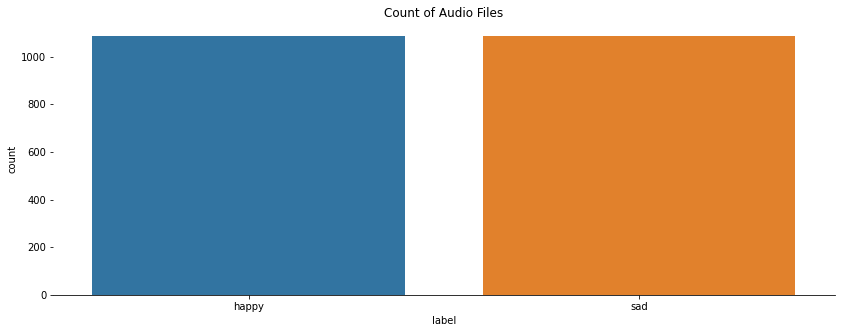

In [23]:
plt.figure(figsize=(14, 5))
sns.countplot(x='label', data=df_fix)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.title('Count of Audio Files')
plt.show()

In [24]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split as tts

X = df_fix.drop(['name', 'label'], axis=1)

scaler = MinMaxScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

# X = np.expand_dims(X, axis=-1)

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

y = np.array(df_fix['label'].apply(lambda x : 1 if x == 'happy' else 0))
# y = OneHotEncoder().fit_transform(df_fix['label'].values.reshape(-1, 1)).toarray()
# y = np.array(df_fix['label'].apply(lambda x : 1 if x == 'happy' else 0))

# y = np.reshape(y, (-1, 1))
# y = OneHotEncoder().fit_transform(y).toarray()

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [25]:
X

array([[0.86138563, 0.77344092, 0.31926824, ..., 0.63357637, 0.33849986,
        0.21604757],
       [0.77592856, 0.81362614, 0.56272286, ..., 0.5457379 , 0.31767479,
        0.08569523],
       [0.80627627, 0.79107199, 0.63221358, ..., 0.63828544, 0.25988327,
        0.14748358],
       ...,
       [0.7275714 , 0.83747781, 0.72785603, ..., 0.57353524, 0.24715421,
        0.06021612],
       [0.76270362, 0.83124635, 0.65712556, ..., 0.55134378, 0.3907297 ,
        0.06960547],
       [0.77376105, 0.81812031, 0.68771669, ..., 0.54443363, 0.39238747,
        0.08605105]])

In [26]:
scaler

MinMaxScaler()

In [27]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [28]:
from sklearn.svm import SVC
def svm_train(X_train, X_test, y_train, y_test, kernel:str='linear', C:float=1.0, gamma:str|int=None, dfs:str=None):
    svc = SVC(kernel=kernel, C=C, gamma=gamma, decision_function_shape=dfs, probability=True)
    svc.fit(X_train, y_train)
    y2 = svc.predict(X_test)
    return accuracy_score(y_test, y2)

In [49]:
def get_svm(X_train, X_test, y_train, y_test)->pd.DataFrame:
    df = pd.DataFrame(columns=['kernel', 'C', 'accuracy (%)','gamma','decision_function_shape'])
    list_gamma = [0.0001, 0.1, 1]
    list_dfs = ['ovo','ovr']
    for a in tqdm(list_dfs):
        for x in [1, 10, 100]:
            for y in ['linear', 'rbf', 'sigmoid']:
                for z in list_gamma:
                    acc = svm_train(X_train, X_test, y_train, y_test, y, x, gamma=z, dfs=a)
                    df = df.append({'kernel': y, 'C': x, 'accuracy (%)': acc.round(2), 'gamma': z, 'decision_function_shape':a}, ignore_index=True)
    return df

In [29]:
# def get_svm(X_train, X_test, y_train, y_test)->pd.DataFrame:
#     df = pd.DataFrame(columns=['kernel', 'C', 'accuracy (%)','gamma','decision_function_shape'])
#     list_gamma = [0.0001, 0.001, 0.1, 1, 'auto','scale']
#     list_dfs = ['ovo','ovr']
#     for a in tqdm(list_dfs):
#         for x in [0.1, 1, 10, 100, 1000]:
#             for y in ['linear', 'poly', 'rbf', 'sigmoid']:
#                 for z in list_gamma:
#                     acc = svm_train(X_train, X_test, y_train, y_test, y, x, gamma=z, dfs=a)
#                     df = df.append({'kernel': y, 'C': x, 'accuracy (%)': acc.round(2), 'gamma': z, 'decision_function_shape':a}, ignore_index=True)
#     return df

In [50]:
get_svm_score = get_svm(X_train, X_test, y_train, y_test)

100%|██████████| 2/2 [00:41<00:00, 20.59s/it]


In [51]:
get_svm_score.sort_values(by='accuracy (%)', ascending=False, inplace=True)

In [52]:
get_svm_score['rank'] = np.arange(1,len(get_svm_score)+1)

In [58]:
get_svm_score.set_index = get_svm_score['rank']

In [61]:
get_svm_score.drop(columns='rank').to_excel(f'{DDIR}/accuracy.xlsx')

In [65]:
get_svm_score_grouped = get_svm_score.groupby(['C','gamma','decision_function_shape','kernel'])['accuracy (%)','rank'].mean()

C:\Users\Windows\AppData\Local\Temp/ipykernel_34924/494282444.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  get_svm_score_grouped = get_svm_score.groupby(['C','gamma','decision_function_shape','kernel'])['accuracy (%)','rank'].mean()


In [36]:
get_svm_score_grouped.to_excel(f'{DDIR}/output.xlsx')

In [37]:
get_svm_score.iloc[0]

kernel                      rbf
C                           1.0
accuracy (%)               0.86
gamma                         1
decision_function_shape     ovo
rank                          1
Name: 39, dtype: object

In [ ]:
# from pandas.plotting import table
# ax = plt.subplot(111, frame_on=False)
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)
# table(ax, accuracy_based_svm, loc='center')
# plt.savefig(f'{DDIR}/svm.png')
# # pd.DataFrame(get_svm_score_grouped)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       222
           1       0.84      0.86      0.85       213

    accuracy                           0.86       435
   macro avg       0.86      0.86      0.86       435
weighted avg       0.86      0.86      0.86       435

Accuracy : 85.52%


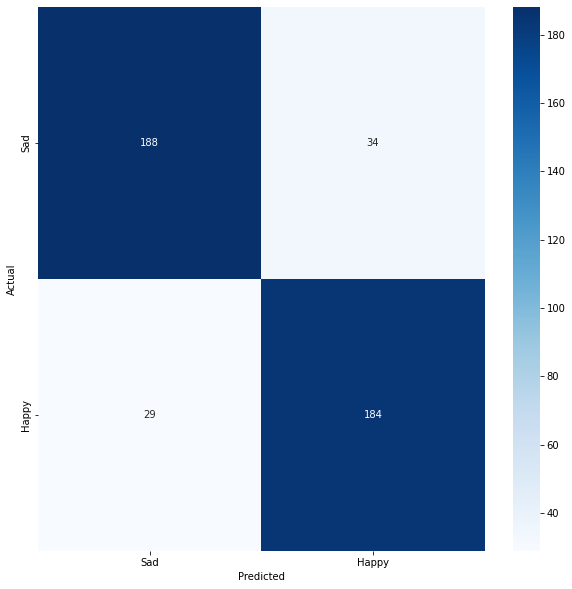

In [38]:
svm_score = SVC(kernel='rbf',C=1.0, gamma=1, decision_function_shape='ovo', probability=True)
svm_score.fit(X_train, y_train)
y_pred = svm_score.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'Accuracy : {accuracy_score(y_test, y_pred).round(4)*100}%')
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
ax = sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.xticks([0.5,1.5], ['Sad', 'Happy'])
plt.yticks([0.5,1.5], ['Sad', 'Happy'])
plt.ylabel('Actual')
plt.show()

In [39]:
get_svm_score.head(5)

,kernel,C,accuracy (%),gamma,decision_function_shape,rank
39,rbf,1.0,0.86,1,ovo,1
159,rbf,1.0,0.86,1,ovr,2
182,rbf,10.0,0.85,0.1,ovr,3
173,linear,10.0,0.85,scale,ovr,4
168,linear,10.0,0.85,0.0001,ovr,5


In [40]:
#TODO : Test input

# INPUT_DIRECTORY = PATH / 'test_input'

# for file_directory in os.listdir(INPUT_DIRECTORY):
#     df = None
#     for files in tqdm(os.listdir(INPUT_DIRECTORY / file_directory)):
#         if(df is None):
#             df = audio_features(path=INPUT_DIRECTORY / file_directory / files, mfcc_num=20)
#         else:
#             input_df = audio_features(path=INPUT_DIRECTORY / file_directory / files, mfcc_num=20)
#             df = pd.concat([df, input_df])


data1 = audio_features(path=HAPPYDIR, mfcc_num=20)
data2 = audio_features(path=SADDIR, mfcc_num=20)

df = pd.concat([data1, data2])

# df = audio_features(path=f'C:\\NGODING\\Python\\PDM\\IPYNB-Code\\Final-Project\\dataset\\Sad', mfcc_num=20)
# df

100%|██████████| 1087/1087 [00:22<00:00, 48.96it/s]


In [41]:
df.reset_index(drop=True, inplace=True)

In [42]:
df

,name,0,1,2,3,4,5,6,7,8,...,53,54,55,56,57,58,59,60,61,label
0,happy-0001.wav,-314.457886,129.294830,-17.988623,33.474461,-11.482511,11.786289,-18.851305,11.302917,-13.167466,...,0.012040,0.005879,0.028319,-0.029148,-0.036382,0.008265,0.018841,0.060542,0.042121,happy
1,happy-0002.wav,-395.502869,136.012527,2.375357,54.128048,-7.307978,23.552362,-23.973137,14.294264,-10.774253,...,0.017362,-0.018477,0.002029,-0.007749,-0.017186,0.004380,-0.015457,0.056817,0.016707,happy
2,happy-0003.wav,-366.721985,132.242188,8.187970,50.447689,-0.746726,10.303167,-12.941866,3.299066,-12.599129,...,0.039773,0.000470,-0.001448,0.001151,-0.006098,0.003033,0.020679,0.046481,0.028754,happy
3,happy-0004.wav,-373.125977,141.114120,-5.783168,48.331936,-8.069846,11.951582,-14.797240,5.968352,-8.678324,...,-0.045382,0.015618,-0.041267,-0.058196,0.033287,0.041998,0.034715,0.052498,0.022308,happy
4,happy-0005.wav,-338.726593,132.259232,-8.114789,44.194748,-7.917725,5.655036,-16.220108,7.988503,-5.889780,...,0.004920,0.015511,0.024280,0.007318,0.057902,-0.003076,-0.043340,0.051477,0.036355,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,sad-1084.wav,-417.924408,139.764908,12.273930,52.263084,-17.304499,27.862864,-14.208331,12.585475,-16.029865,...,0.018113,0.007671,0.040276,-0.011110,-0.022177,0.020251,-0.014291,0.059745,0.013470,sad
2170,sad-1085.wav,-446.779114,138.702423,27.430937,46.717846,-11.167727,24.803400,-5.096362,12.582688,-7.809765,...,0.017133,-0.021457,-0.020824,-0.051119,-0.039315,-0.010041,-0.028530,0.038625,0.009433,sad
2171,sad-1086.wav,-441.363373,139.999771,16.188068,66.505608,-11.208609,26.212502,-17.580864,12.032382,-12.642308,...,0.039546,0.029427,0.037083,0.016093,0.018286,-0.032602,-0.004603,0.044205,0.011740,sad
2172,sad-1087.wav,-408.045013,138.958069,10.271755,55.551472,-16.234924,26.500011,-16.514378,11.222992,-13.605694,...,0.041527,0.007327,0.029200,-0.019093,-0.030070,-0.008891,-0.013268,0.069884,0.013570,sad


In [43]:
def prediction(model:object=None, df:pd.DataFrame=None):
    temp = df
    X = temp.drop(['name', 'label'], axis=1)
    # scaler = MinMaxScaler()
    X = scaler.transform(X)
    y = np.array(temp['label'].apply(lambda x : 1 if x == 'happy' else 0))
    y_pred = model.predict(X)
    print(classification_report(y, y_pred))
    fig = plt.figure(figsize=(10,10))
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.xticks([0.5,1.5], ['Sad', 'Happy'])
    plt.yticks([0.5,1.5], ['Sad', 'Happy'])
    plt.ylabel('Actual')
    plt.show()
    
    for i in range(len(y)):
        print('Prediction for {} : {}'.format(df['name'].iloc[i], 'happy' if y_pred[i]==1 else 'sad'))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1087
           1       0.91      0.90      0.90      1087

    accuracy                           0.90      2174
   macro avg       0.90      0.90      0.90      2174
weighted avg       0.90      0.90      0.90      2174



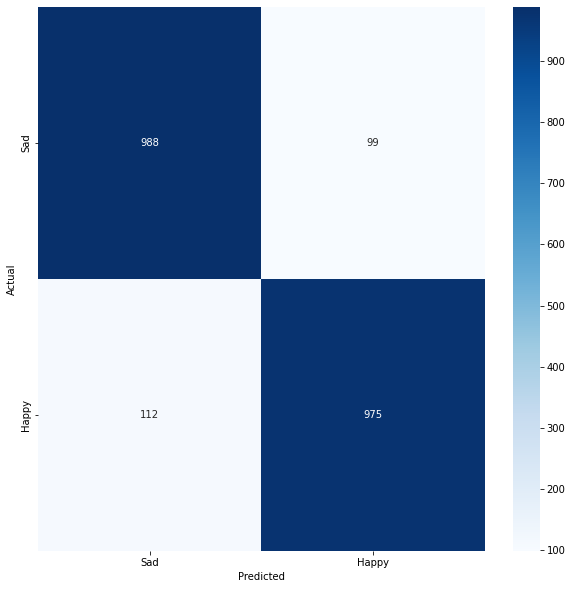

Prediction for happy-0001.wav : happy
Prediction for happy-0002.wav : happy
Prediction for happy-0003.wav : happy
Prediction for happy-0004.wav : happy
Prediction for happy-0005.wav : happy
Prediction for happy-0006.wav : happy
Prediction for happy-0007.wav : happy
Prediction for happy-0008.wav : happy
Prediction for happy-0009.wav : happy
Prediction for happy-0010.wav : happy
Prediction for happy-0011.wav : happy
Prediction for happy-0012.wav : sad
Prediction for happy-0013.wav : happy
Prediction for happy-0014.wav : happy
Prediction for happy-0015.wav : happy
Prediction for happy-0016.wav : happy
Prediction for happy-0017.wav : sad
Prediction for happy-0018.wav : happy
Prediction for happy-0019.wav : happy
Prediction for happy-0020.wav : happy
Prediction for happy-0021.wav : happy
Prediction for happy-0022.wav : happy
Prediction for happy-0023.wav : happy
Prediction for happy-0024.wav : happy
Prediction for happy-0025.wav : happy
Prediction for happy-0026.wav : happy
Prediction for h

In [44]:
prediction(svm_score, df)

# y_predict = svm_score.predict(df.drop(columns=['name','label'],inplace=False))

In [45]:
# y = np.array(df['label'].apply(lambda x : 1 if x == 'happy' else 0))

In [ ]:
# X = df.drop(columns=['name','label'],axis=1)
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [ ]:
# svm_score = SVC(kernel='rbf',C=1.0, gamma=1, decision_function_shape='ovo')
# from sklearn.model_selection import KFold

# acc_arr = np.empty((10,1))
# x=0

# kf = KFold(n_splits=10, shuffle=True)
# for train_index, test_index in kf.split(X,y):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     svm_score.fit(X_train, y_train)
#     y_prediction = svm_score.predict(X_test)
#     print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_prediction)))
#     print("\n", classification_report(y_prediction, y_test))
    
#     # cnf_matrix = confusion_matrix(y_test, y_prediction)
#     # plt.figure(figsize=(10,10))
#     # acc_arr.append(accuracy_score(y_test,y_prediction))
#     acc_arr[x] = accuracy_score(y_test,y_prediction)
#     x+=1

# print("%0.2f accuracy with a standard deviation of %0.2f" %(acc_arr.mean(), acc_arr.std()))

In [ ]:
# prediction(svm_score, df)

In [ ]:
# y = list(map(lambda x : 1 if x == 'happy' else 0, df['label']))

In [ ]:
# np.unique(y, return_counts=True)

In [ ]:
# from sklearn.model_selection import cross_val_score, cross_validate

# # scores = cross_validate(estimator=svm_score, X=X, y=y, cv=10, scoring=['accuracy','precision','recall','f1'], return_train_score=True)
# scores = cross_val_score(estimator=svm_score, X=X, y=y, cv=10, scoring='accuracy')

In [ ]:
# scores.mean()

In [ ]:
# scores['test_accuracy'].mean()

In [46]:
#TODO : Save model

import joblib
filename = 'svm_model_kelompok_dimas_pande_wahyu.joblib'
joblib.dump(svm_score, filename=filename)

scalername = 'svm_scaler_kelompok_dimas_pande_wahyu.joblib'
joblib.dump(scaler, filename=scalername)

['svm_scaler_kelompok_dimas_pande_wahyu.joblib']

In [47]:
import pickle
pickle.dump(svm_score, open('svm_model_kelompok_dimas_pande_wahyu.pkl', 'wb'))

pickle.dump(scaler, open('svm_scaler_kelompok_dimas_pande_wahyu.pkl', 'wb'))

In [ ]:
#TODO : Load model

# load_model = joblib.load(filename=filename)
# result = load_model.score(X_test, y_test)
# predict = load_model.predict(X_test)
# print(result)
# print(predict)

In [48]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],1)))
    model.add(layers.Conv1D(filters=hp.Choice('filters', [16,32,64])
                                             ,kernel_size=3
                                             ,activation='relu'
                                             ,kernel_initializer='he_normal'
                                             ,padding='same'))
    model.add(layers.MaxPooling1D(3, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    for i in range(hp.Int('num_layers', 3, 6)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32), activation='relu'))
        model.add(layers.BatchNormalization())

    model.add(layers.Dense(2, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
tuner = kt.Hyperband(hypermodel=build_model,
                     objective='val_accuracy',
                     max_epochs=100,
                     factor=3,
                     hyperband_iterations=3,
                     seed=42,
                     overwrite=True)

In [ ]:
# len(y_train)

In [ ]:
tuner.search(x=X_train,
             y=y_train,
             validation_split=0.2,
             callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)], 
             epochs=30         
            )

Trial 762 Complete [00h 00m 05s]
val_accuracy: 0.8563218116760254

Best val_accuracy So Far: 0.8850574493408203
Total elapsed time: 00h 50m 50s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_hp = tuner.get_best_hyperparameters()[0]
final_model = tuner.hypermodel.build(best_hp)

final_model_history = final_model.fit(x=X_train,
                                      y=y_train,
                                      validation_split=0.2,
                                      callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)],
                                      epochs=50)

Epoch 1/50
44/44 [==============================] - 2s 9ms/step - loss: 0.6687 - accuracy: 0.7685 - val_loss: 0.8170 - val_accuracy: 0.4511
Epoch 2/50
44/44 [==============================] - 0s 6ms/step - loss: 0.3933 - accuracy: 0.8361 - val_loss: 0.4193 - val_accuracy: 0.8190
Epoch 3/50
44/44 [==============================] - 0s 5ms/step - loss: 0.3906 - accuracy: 0.8217 - val_loss: 0.3760 - val_accuracy: 0.8592
Epoch 4/50
44/44 [==============================] - 0s 5ms/step - loss: 0.3433 - accuracy: 0.8569 - val_loss: 0.4843 - val_accuracy: 0.7385
Epoch 5/50
44/44 [==============================] - 0s 5ms/step - loss: 0.3100 - accuracy: 0.8792 - val_loss: 0.3621 - val_accuracy: 0.8333
Epoch 6/50
44/44 [==============================] - 0s 5ms/step - loss: 0.2783 - accuracy: 0.8972 - val_loss: 0.4109 - val_accuracy: 0.8391
Epoch 7/50
44/44 [==============================] - 0s 5ms/step - loss: 0.2771 - accuracy: 0.8922 - val_loss: 0.7926 - val_accuracy: 0.7385
Epoch 8/50
44/44 [==

14/14 [==============================] - 0s 2ms/step


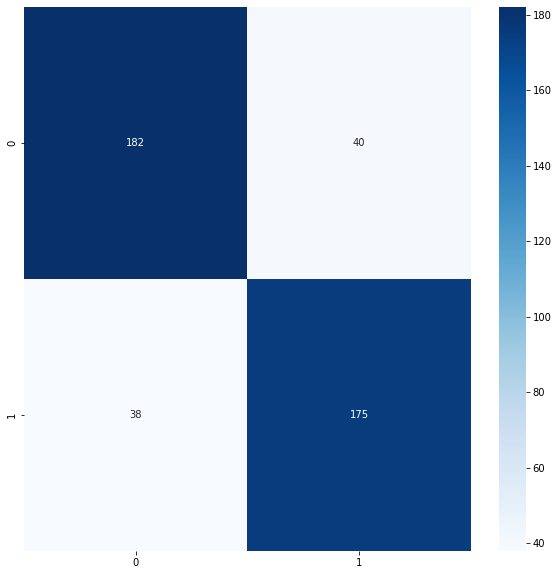

In [ ]:
y_predict = final_model.predict(X_test)
matrix = confusion_matrix(y_test, np.argmax(y_predict, axis=1))
plt.figure(figsize=(10,10))
ax = sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

In [ ]:
import pickle

pickle.dump(final_model, open('cnn_model_kelompok_dimas_pande_wahyu.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_3
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_4
......vars
.........0
.........1
.........2
.........3
...layers\conv1d
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling1d
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......va

In [ ]:
# check_num = 8

# print(y_test[check_num])

# final_model.predict(X_test[check_num].reshape(1, -1, 1))